In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from collections import OrderedDict
from manifold_helper import unpickle, ManifoldHelper
from sklearn.utils import shuffle

rng = np.random.default_rng(42)

In [2]:
size = 0.2

In [3]:
dataset = unpickle('data/cifar-10/data_batch_1')
dataset.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [4]:
data, labels = (dataset[b'data'], dataset[b'labels'])

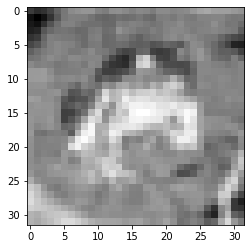

In [5]:
X = data[:, :1024] # rgb -> 1 channel
plt.imshow(X[0, :].reshape((32, 32)), 'gray')

In [6]:
sample_size = int(size * len(X))
x_cut = X[:sample_size, :]
label_cut = labels[:sample_size]
x_cut.shape

(2000, 1024)

In [7]:
x_cut, label_cut = shuffle(x_cut, label_cut, random_state=42)

In [8]:
unique, counts = np.unique(label_cut, return_counts=True)
num_data = dict(zip(unique, counts))
num_data

{0: 202,
 1: 191,
 2: 203,
 3: 195,
 4: 214,
 5: 183,
 6: 207,
 7: 199,
 8: 203,
 9: 203}

In [9]:
label_colors = [list( mcolors.TABLEAU_COLORS )[i] for i in range( 10 )]
colors = [label_colors[i] for i in label_cut]

In [10]:
methods = ['ISOMAP', 'LLE', 'SE', 'LTSA']
neighbors=[5, 10, 45]
dimensions=[2, 10, 30]
manifold = ManifoldHelper([5, 10, 45], [2, 10, 30], methods)

In [12]:
import warnings
warnings.filterwarnings("ignore")
ari_results = manifold.evaluate_all(x_cut, label_cut, n_components=10)

2_dimension:

   5_neighbors: 0.02  0.02  0.01  0.00 
   10_neighbors: 0.02  0.01  0.01  0.00 
   45_neighbors: 0.02  0.02  0.01  0.00 10_dimension:

   5_neighbors: 0.02  0.02  0.03  0.00 
   10_neighbors: 0.03  0.02  0.02  0.01 
   45_neighbors: 0.03  0.02  0.02  0.00 30_dimension:

   5_neighbors: 0.02  0.02  0.02  0.00 
   10_neighbors: 0.03  0.02  0.02  0.00 
   45_neighbors: 0.02  0.02  0.02  0.00 

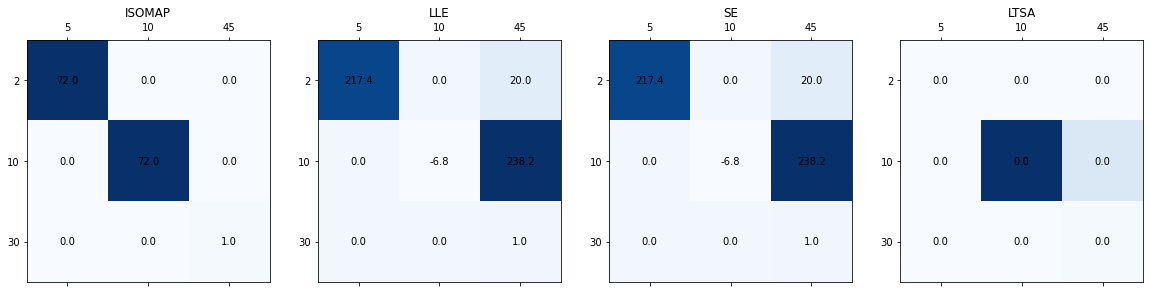

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(20, 20))
for ax, m in zip(axs, methods):
    ax.matshow(ari_results[m], cmap='Blues')
    ax.set_title(m)
    ax.set_xticks([i for i in range(len(neighbors))])
    ax.set_yticks([i for i in range(len(dimensions))])
    ax.set_xticklabels(neighbors)
    ax.set_yticklabels(dimensions)
    for (i, j), z in np.ndenumerate(ari_results[m]):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

In [ ]:
print(ari_results)

In [14]:
ari_results['ISOMAP'][0, 0]

72.0